In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [3]:
# Establecer una semilla para reproducibilidad
seed_value = 73
random.seed(seed_value)        # Semilla para Python
np.random.seed(seed_value)     # Semilla para NumPy
tf.random.set_seed(seed_value) # Semilla para TensorFlow/Keras

# A partir de aquí, puedes continuar con la construcción y entrenamiento de tu modelo de Keras

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras

image_size = 150
data_dir1 = "/kaggle/input/gemstones/FYP_Datasets/train"
data_dir2 = "/kaggle/input/gemstones/FYP_Datasets/validation"
data_dir3 = "/kaggle/input/gemstones/FYP_Datasets/test"
batch_size = 64
rescale_factor = 1./255

# Crear un generador para aumentar datos
train_datagen = ImageDataGenerator(
    rescale=rescale_factor,    # Normalizar los valores de los píxeles
    shear_range=0.2,   # Rango para las transformaciones aleatorias
    zoom_range=0.2,    # Rango para el zoom aleatorio
    horizontal_flip=True) # Activar el giro horizontal aleatorio

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    data_dir1,      # Directorio con datos
    target_size=(image_size, image_size), # Cambiar el tamaño de las imágenes a 50x50
    batch_size=batch_size,
    class_mode='categorical') # 'binary' para clasificación binaria, 'categorical' para multiclase

# Cargar imágenes de validación
validation_generator = train_datagen.flow_from_directory(
    data_dir2,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

# Cargar imágenes de prueba
test_generator = tensorflow.keras.preprocessing.image_dataset_from_directory(
    data_dir3,
    image_size=(image_size, image_size),
    batch_size=batch_size,
    label_mode='categorical')

Found 3043 images belonging to 6 classes.
Found 1500 images belonging to 6 classes.
Found 1500 files belonging to 6 classes.


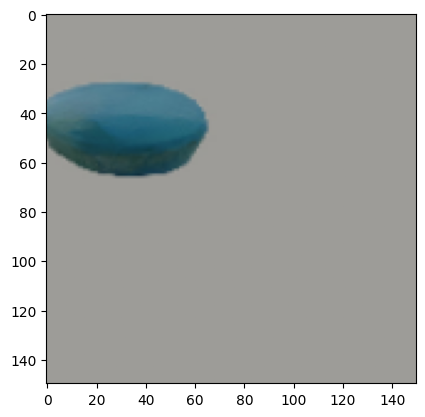

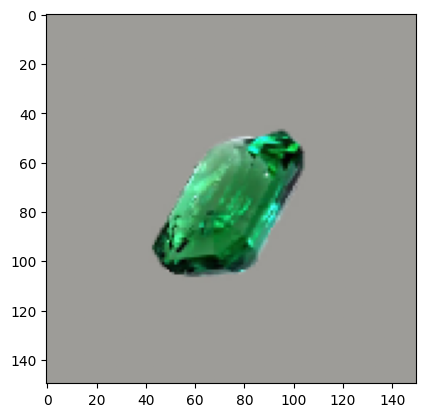

In [5]:
# ver imagenes
x_batch, y_batch = next(train_generator)
for i in range (0, 2):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [6]:
# Construir el modelo
# Capas convolucionales
# Capas fully connected (clasificador)

model = Sequential()
# Capas convolucionales
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 3))) # 3 canales de color
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout después de la capa de conv2D
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Dropout después de la capa de conv2D
model.add(Flatten()) # Aplanar la salida de la capa convolucional
# Capas fully connected (clasificador)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout antes de la capa de salida
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [7]:
from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # 'patience' es el número de épocas sin mejora después de las cuales el entrenamiento se detendrá

Epoch 1/50


2024-01-08 16:59:36.163465: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


48/48 [==============================] - 55s 1s/step - loss: 1.7109 - accuracy: 0.4463 - val_loss: 0.9264 - val_accuracy: 0.5880
Epoch 2/50
48/48 [==============================] - 37s 773ms/step - loss: 0.6840 - accuracy: 0.7374 - val_loss: 0.6947 - val_accuracy: 0.6987
Epoch 3/50
48/48 [==============================] - 37s 768ms/step - loss: 0.5474 - accuracy: 0.7986 - val_loss: 0.7206 - val_accuracy: 0.6820
Epoch 4/50
48/48 [==============================] - 37s 773ms/step - loss: 0.4446 - accuracy: 0.8314 - val_loss: 0.5960 - val_accuracy: 0.7620
Epoch 5/50
48/48 [==============================] - 37s 765ms/step - loss: 0.3641 - accuracy: 0.8616 - val_loss: 0.5527 - val_accuracy: 0.7860
Epoch 6/50
48/48 [==============================] - 36s 758ms/step - loss: 0.3267 - accuracy: 0.8801 - val_loss: 0.5096 - val_accuracy: 0.8193
Epoch 7/50
48/48 [==============================] - 37s 765ms/step - loss: 0.2703 - accuracy: 0.9001 - val_loss: 0.5416 - val_accuracy: 0.8500
Epoch 8/50
48

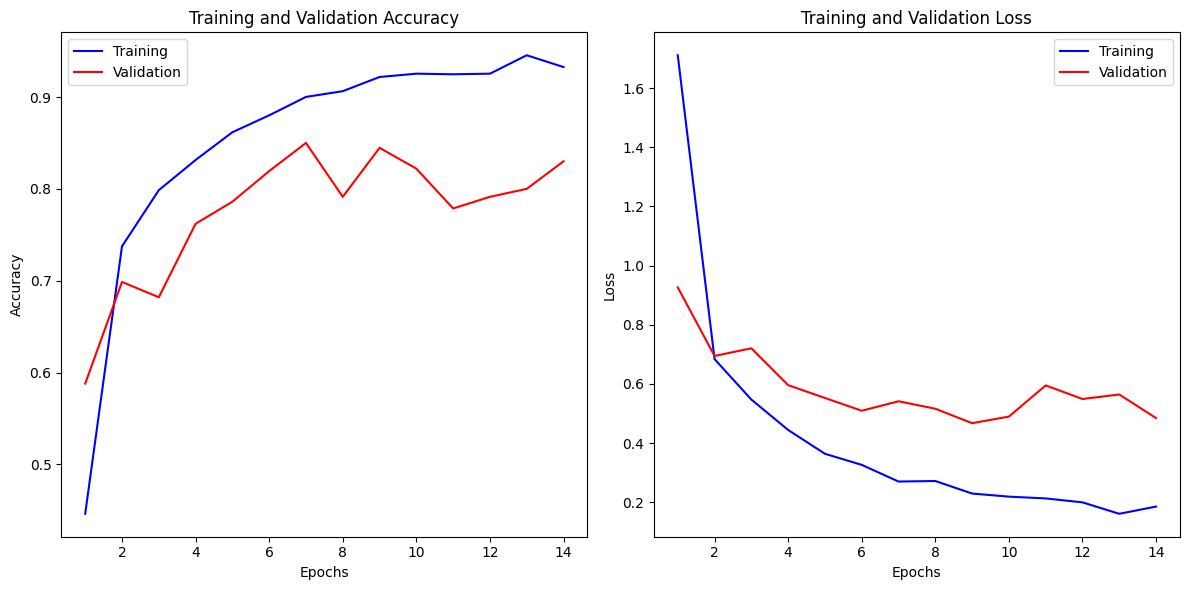

In [8]:
# Compilar el modelo

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50

# Entrenar el modelo
history_of_train = model.fit(train_generator, epochs=epochs,
                             validation_data = validation_generator,
                             callbacks = [early_stopping])


generatePlot(history_of_train)

In [9]:
etiquetas = ['Emerald', 'Fake_Emerald', 'Fake_Ruby', 'Fake_Turquoise', 'Ruby', 'Turquoise']
clases_predichas = {etiqueta: {'real': 0, 'predicha': 0} for etiqueta in etiquetas}  # Inicializar el contador para cada clase

total = 0
hits = 0

print("PREDICHA -> REAL")

for minilote in test_generator:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    
    for y_predicha, y_real in zip(np.round(prediccion_minilote, 3), etiqueta_real_minilote):
        total += 1
        clase_predicha = etiquetas[np.argmax(y_predicha)]
        clase_real = etiquetas[np.argmax(y_real)]
        
        clases_predichas[clase_predicha]['predicha'] += 1  # Incrementar el contador de predicciones de la clase predicha
        clases_predichas[clase_real]['real'] += 1  # Incrementar el contador de predicciones de la clase real

        if np.argmax(y_predicha) == np.argmax(y_real):
            hits += 1

        # Imprimir las predicciones y errores como antes
        if np.argmax(y_predicha) == np.argmax(y_real):
            print(clase_predicha, "->", clase_real)
        else:
            print(clase_predicha, "->", clase_real, "✘")

print("===============================")
print("TOTAL: ", total, " | HITS: ", hits)
print("HITS PERCENTAGE: ", round(hits/total * 100, 2), "%")
print("===============================")
print("Recuento de predicciones por clase:")
for etiqueta, counts in clases_predichas.items():
    print(f"{etiqueta}: Real - {counts['real']} | Predicha - {counts['predicha']}")


PREDICHA -> REAL
2/2 [==============================] - 0s 6ms/step
Turquoise -> Turquoise
Turquoise -> Fake_Turquoise ✘
Fake_Ruby -> Fake_Ruby
Turquoise -> Emerald ✘
Turquoise -> Fake_Turquoise ✘
Turquoise -> Fake_Turquoise ✘
Ruby -> Ruby
Fake_Ruby -> Fake_Ruby
Emerald -> Emerald
Fake_Ruby -> Fake_Ruby
Turquoise -> Fake_Turquoise ✘
Ruby -> Ruby
Fake_Ruby -> Fake_Ruby
Turquoise -> Turquoise
Fake_Ruby -> Fake_Ruby
Turquoise -> Turquoise
Turquoise -> Fake_Emerald ✘
Ruby -> Ruby
Turquoise -> Fake_Emerald ✘
Emerald -> Emerald
Turquoise -> Turquoise
Turquoise -> Fake_Emerald ✘
Ruby -> Ruby
Fake_Ruby -> Fake_Ruby
Turquoise -> Turquoise
Ruby -> Ruby
Fake_Ruby -> Ruby ✘
Turquoise -> Turquoise
Fake_Ruby -> Fake_Ruby
Ruby -> Ruby
Turquoise -> Fake_Turquoise ✘
Turquoise -> Turquoise
Turquoise -> Emerald ✘
Turquoise -> Emerald ✘
Fake_Ruby -> Fake_Ruby
Turquoise -> Turquoise
Fake_Turquoise -> Fake_Turquoise
Turquoise -> Emerald ✘
Turquoise -> Fake_Turquoise ✘
Turquoise -> Fake_Emerald ✘
Turquoise -

(150, 150, 3)
1/1 [==============================] - 0s 224ms/step
El vector de salida obtenido:  [[0. 0. 0. 0. 0. 1.]]
1/1 [==============================] - 0s 19ms/step
La etiqueta de salida predicha es  5
1/1 [==============================] - 0s 19ms/step
Ahora dicho con texto: La etiqueta de salida predicha es  Turquoise


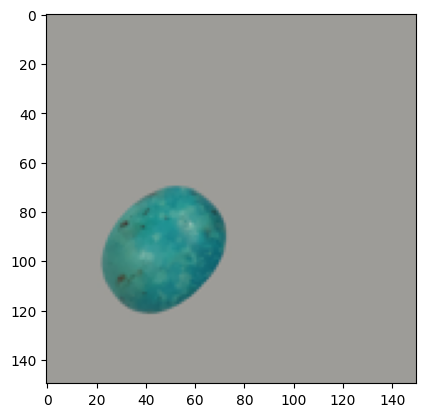

In [10]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Emerald', 'Fake_Emerald', 'Fake_Ruby', 'Fake_Turquoise', 'Ruby', 'Turquoise']
%matplotlib inline

pil_im = Image.open('/kaggle/input/gemstones/FYP_Datasets/test/Turquoise/Turqoise_700.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3

im = im.reshape(1,150,150,3)


print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', np.argmax(model.predict(im)))
print('Ahora dicho con texto: La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])